In [1]:
import kagglehub
import pandas as pd

/home/coolss/Projects/book_recommender/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)


Path to dataset files: /home/coolss/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [3]:
books=pd.read_csv(f"{path}/books.csv")
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [12]:
!pip install langchain langchain_core langchain_community langchain_chroma chromadb openai tiktoken transformers sentence_transformers faiss-cpu seaborn matplotlib


  Using cached langchain-0.3.27-py3-none-any.whl.metadata (7.8 kB)
  Using cached langchain_community-0.3.29-py3-none-any.whl.metadata (2.9 kB)
  Using cached chromadb-1.0.21-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.3 kB)
  Using cached openai-1.107.2-py3-none-any.whl.metadata (29 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached pydantic_settings-2.10.1-py3-none-any.whl.metadata (3.4 kB)
  Using cached httpx_sse-0.4.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached marshmallow-3.26.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached python_dotenv-1.1.1-py3-none-any.whl.metadata (24 kB)
  Using cached mypy_extensions-1.1.0-py3-none-any.whl.metadata (1.1 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) .

IOStream.flush timed out


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120/120 [langchain_chroma]n_chroma]ty]ext-splitters]s]
^C


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count'],
      dtype='object')


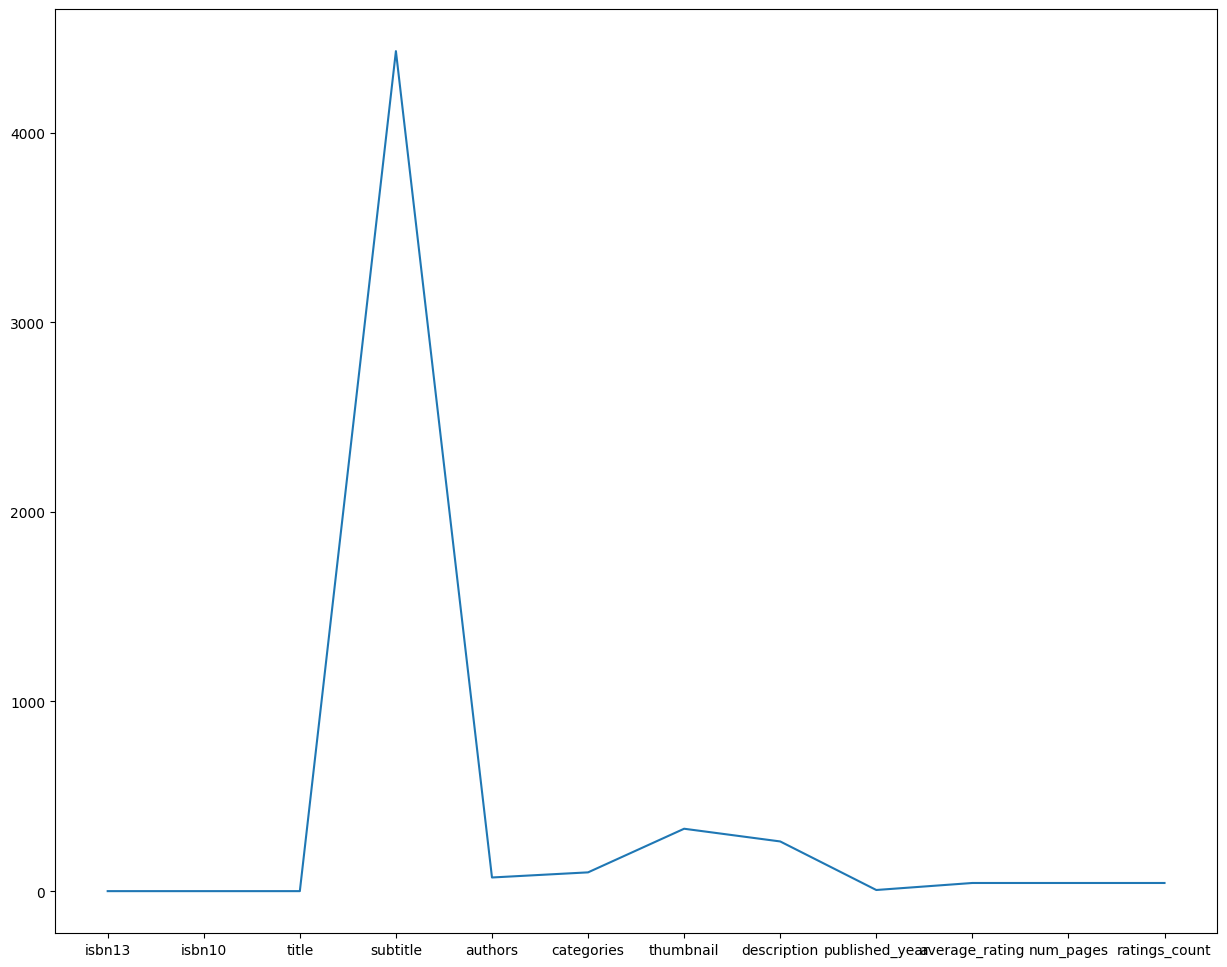

In [5]:
print(books.columns)
plt.figure(figsize=(15,12))
plt.plot(books.columns,books.isna().sum())

In [6]:

books_imp=books.dropna(subset=["description","average_rating","num_pages","published_year"])
books_imp.shape

(6507, 12)

In [7]:
print(books_imp["categories"].value_counts())


categories
Fiction                      2523
Juvenile Fiction              534
Biography & Autobiography     391
History                       258
Literary Criticism            164
                             ... 
English essays                  1
Inventions                      1
Building laws                   1
LITERARY CRITICISM              1
Amish                           1
Name: count, Length: 531, dtype: int64


In [8]:
books_imp["words_in_description"]=books_imp["description"].str.split(" ").str.len()
books_imp["words_in_description"]

/tmp/ipykernel_37776/3453126975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_imp["words_in_description"]=books_imp["description"].str.split(" ").str.len()


0       199
1       205
2        14
3        57
4        45
       ... 
6803     63
6804    117
6805    174
6808    245
6809     20
Name: words_in_description, Length: 6507, dtype: int64

In [ ]:
books_imp[books_imp["words_in_description"].between(1,20)]["description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
6                                               Donation.
10      One of Sidney Sheldon's most popular and bests...
11                                         Fantasy-roman.
32      Tells the story of three generations of Chines...
                              ...                        
6776    Raymond Chandler meets The Exorcist. Classic n...
6783    Basics Illustration 01: Thinking Visually expl...
6794                                 源氏物語54帖、「宮田切り絵」の真骨頂。
6795    Book Of Five Rings is a Kodansha International...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 912, dtype: object

In [11]:
books_imp[books_imp["words_in_description"].between(1,25)]["description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
6                                               Donation.
10      One of Sidney Sheldon's most popular and bests...
11                                         Fantasy-roman.
32      Tells the story of three generations of Chines...
                              ...                        
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6794                                 源氏物語54帖、「宮田切り絵」の真骨頂。
6795    Book Of Five Rings is a Kodansha International...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 1419, dtype: object

In [12]:
books_sen=books_imp[books_imp["words_in_description"]>=23]
books_sen

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,174


In [18]:
import numpy as np

books_sen["title_and_sub"]=np.where(books_sen["subtitle"].isna(),books_sen["title"],books_sen["title"]+": "+books_sen["subtitle"])
books_sen["title_and_sub"]

/tmp/ipykernel_37776/286340678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_sen["title_and_sub"]=np.where(books_sen["subtitle"].isna(),books_sen["title"],books_sen["title"]+": "+books_sen["subtitle"])


0                                                  Gilead
1                                   Spider's Web: A Novel
3                                          Rage of angels
4                                          The Four Loves
5                                     The Problem of Pain
                              ...                        
6802                                    Mistaken Identity
6803                                  Journey to the East
6804    The Monk Who Sold His Ferrari: A Fable About F...
6805       I Am that: Talks with Sri Nisargadatta Maharaj
6808                             The Berlin Phenomenology
Name: title_and_sub, Length: 5403, dtype: object

In [20]:
books_sen["tagged_description"]=books_sen["isbn13"].astype(str)+" "+books_sen["description"]
books_sen["tagged_description"]

/tmp/ipykernel_37776/3390887189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_sen["tagged_description"]=books_sen["isbn13"].astype(str)+" "+books_sen["description"]


0       9780002005883 A NOVEL THAT READERS and critics...
1       9780002261982 A new 'Christie for Christmas' -...
3       9780006178736 A memorable, mesmerizing heroine...
4       9780006280897 Lewis' work on the nature of lov...
5       9780006280934 "In The Problem of Pain, C.S. Le...
                              ...                        
6802    9788172235222 On A Train Journey Home To North...
6803    9788173031014 This book tells the tale of a ma...
6804    9788179921623 Wisdom to Create a Life of Passi...
6805    9788185300535 This collection of the timeless ...
6808    9789027712059 Since the three volume edition o...
Name: tagged_description, Length: 5403, dtype: object

In [24]:
books_cleaned=books_sen.drop(["subtitle","words_in_description"],axis=1)
books_cleaned.to_csv("books_cleaned.csv",index=False)